## Load Data and Initial Grid Search

In [1]:
DATA_NAME = 'batch0approx1e5-agriVision-fourier-red' # size-name-transform-channel

In [2]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
RERUN = True
CWD

'/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/results/case-studies/agriVision/fourier/batch0approx1e5/red'

In [3]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [4]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples

{2: 45000,
 3: 72000,
 4: 63000,
 5: 117000,
 6: 126000,
 7: 171000,
 8: 189000,
 9: 297000,
 10: 396000,
 11: 495000,
 12: 648000,
 13: 882000,
 14: 1134000,
 15: 1539000,
 16: 1953000,
 17: 2574000,
 18: 3456000,
 19: 4563000,
 20: 5967000,
 21: 8010000,
 22: 10395000,
 23: 13887000,
 24: 18297000,
 25: 24057000,
 26: 31968000,
 27: 42183000,
 28: 55764000,
 29: 73701000,
 30: 97326000,
 31: 108342000,
 32: 59634000,
 33: 21420000}

In [5]:
group_data_map[5]

array([-1523488.1 , -1135341.8 ,  -968976.  , ...,   728119.94,
         809827.9 ,   849071.75], dtype=float32)

In [6]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


(r,eta),cdf     r  eta  \
0  ((0.02, -1.4), <scipy.interpolate._fitpack2.In...  0.02 -1.4   
1  ((0.02, -1.3), <scipy.interpolate._fitpack2.In...  0.02 -1.3   
2  ((0.02, -1.2), <scipy.interpolate._fitpack2.In...  0.02 -1.2   
3  ((0.02, -1.1), <scipy.interpolate._fitpack2.In...  0.02 -1.1   
4  ((0.02, -1.0), <scipy.interpolate._fitpack2.In...  0.02 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  9.618487e+69   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.821735e+74   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.455488e+78   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.406735e+81   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  5.331443e+83   

       kurtosis  
0  1.391529e+25  
1  8.172634e+21  
2  4.131785e+19  
3  6.947275e+17  
4  2.562075e+16

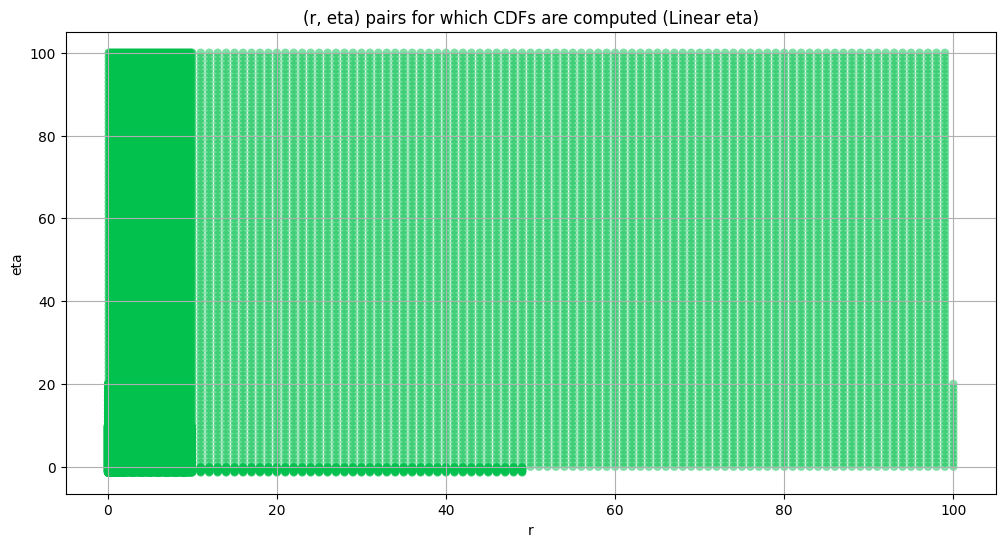

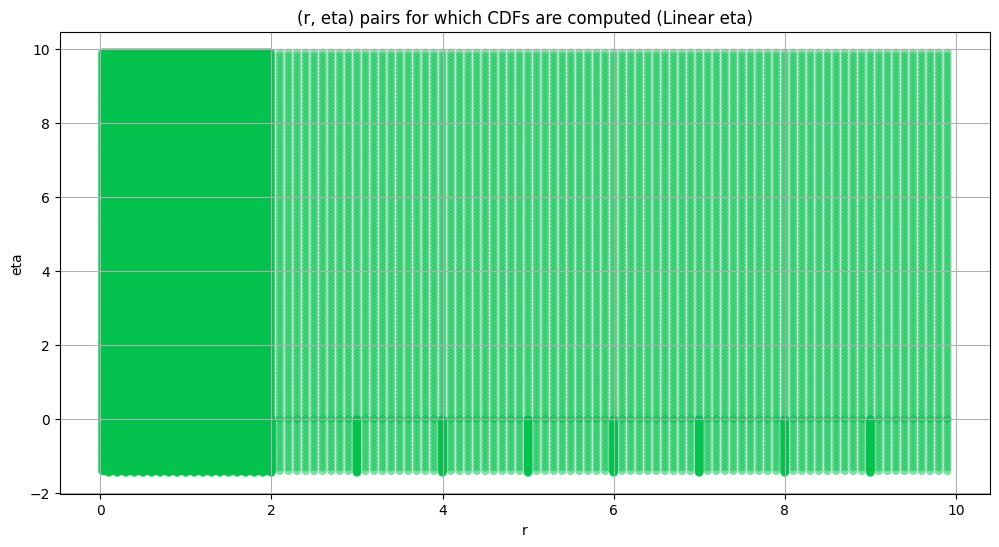

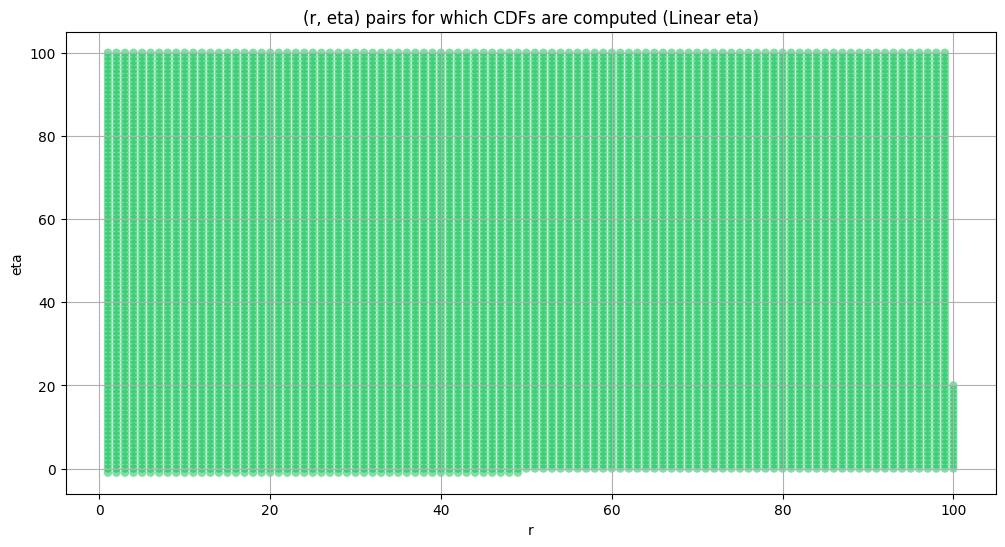

/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/brandonmarks/opt/anaconda3/envs/HBMV/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


r           eta       variance      kurtosis
count  55966.000000  55966.000000   5.596600e+04  5.472500e+04
mean      11.556061     19.856190            inf           inf
std       22.037516     27.794814            inf           NaN
min        0.020000     -1.450000   0.000000e+00  4.787254e-04
25%        0.980000      2.000000   9.733362e-01  1.987414e-02
50%        1.930000      6.900000   1.381758e+00  2.368581e-01
75%        8.000000     26.000000   5.224203e+00  9.264833e-01
max      100.000000    100.000000  1.797693e+308           inf

In [7]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [8]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99

In [9]:
var_kurt_df_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not var_kurt_df_path.exists():
    for group in  GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
var_kurt_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
master_df

Band 2


100%|██████████| 100000/100000 [00:43<00:00, 2274.31it/s]


Band 5


100%|██████████| 100000/100000 [00:41<00:00, 2412.20it/s]


Band 8


100%|██████████| 100000/100000 [00:41<00:00, 2432.87it/s]


Band 11


100%|██████████| 100000/100000 [00:41<00:00, 2437.25it/s]


Band 14


100%|██████████| 100000/100000 [00:41<00:00, 2429.45it/s]


Band 17


100%|██████████| 100000/100000 [00:41<00:00, 2438.66it/s]


Band 20


100%|██████████| 100000/100000 [00:41<00:00, 2434.71it/s]


Band 23


100%|██████████| 100000/100000 [00:41<00:00, 2433.45it/s]


Band 26


100%|██████████| 100000/100000 [00:41<00:00, 2427.86it/s]


Band 29


100%|██████████| 100000/100000 [00:41<00:00, 2435.37it/s]


Band 32


100%|██████████| 100000/100000 [00:41<00:00, 2436.41it/s]


obs_var     var_lower     var_upper     obs_kurt  kurt_lower  \
band                                                                      
2     4.431448e+08  2.040596e+08  1.172903e+09   1951.21090   93.389990   
5     2.425320e+08  1.167651e+08  6.376787e+08   1732.74070  102.459850   
8     7.509878e+07  4.135542e+07  1.652329e+08    997.55035   76.816630   
11    6.680555e+07  1.909183e+07  4.286987e+08  13976.00800   62.877470   
14    1.964670e+07  9.259367e+06  7.427187e+07   4449.84300   48.653390   
17    9.104094e+06  4.527121e+06  3.404876e+07   4455.63230   42.402900   
20    4.104360e+06  2.023371e+06  1.352017e+07   3024.86230   61.902660   
23    1.838956e+06  6.761338e+05  1.053360e+07  11453.02000   71.847640   
26    1.165550e+06  2.007962e+05  1.103753e+07  27543.82800   79.598564   
29    3.894244e+05  2.562034e+04  3.816464e+06  38067.58200  100.885220   
32    1.268741e+04  2.705703e+03  7.869186e+04  13939.49500   95.461980   

      kurt_upper  total_samples  
band                             
2      3809.4540        45000.0  
5      3959.4731       117000.0  
8      2699.5813       189000.0  
11     8349.7330       495000.0  
14     6157.9995      1134000.0  
17     6093.3640      2574000.0  
20     4879.5195      5967000.0  
23     7815.2046     13887000.0  
26     9199.3900     31968000.0  
29     9678.4180     73701000.0  
32     8480.3460     59634000.0

####
Band  2


100%|██████████| 55966/55966 [01:12<00:00, 774.89it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 45000, Without approximation : 45000.0


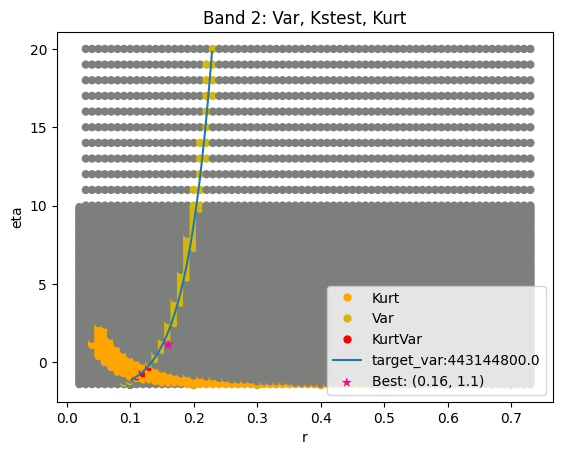

####
Band  5


100%|██████████| 55966/55966 [02:34<00:00, 363.37it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 117000.0


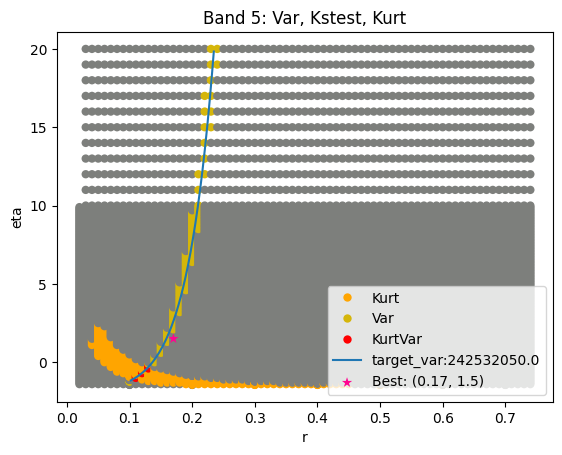

####
Band  8


100%|██████████| 55966/55966 [02:34<00:00, 362.98it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 189000.0


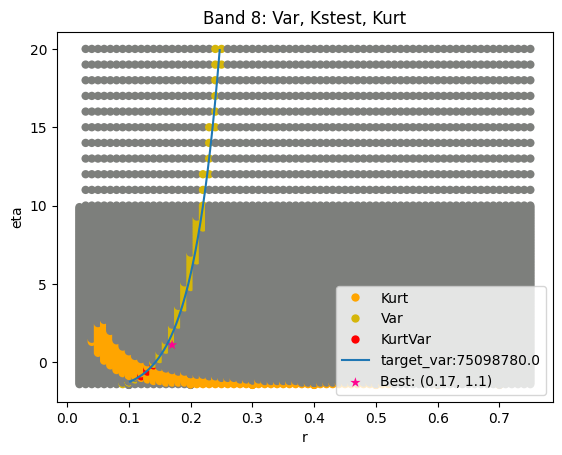

####
Band  11


100%|██████████| 55966/55966 [02:33<00:00, 363.56it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 495000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


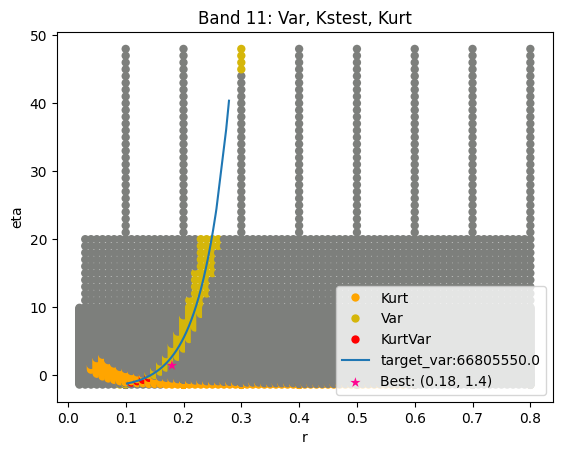

####
Band  14


100%|██████████| 55966/55966 [02:34<00:00, 362.37it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 1134000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


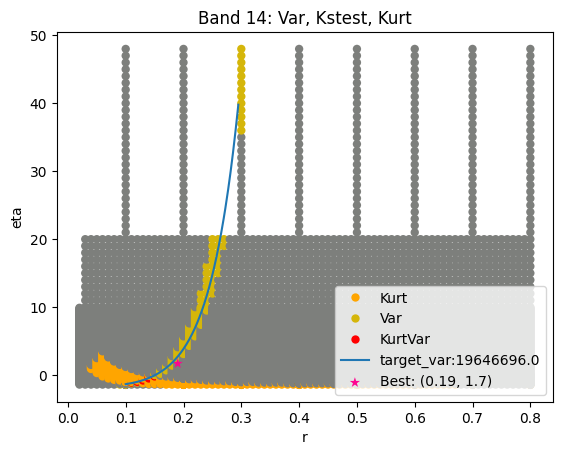

####
Band  17


100%|██████████| 55966/55966 [02:35<00:00, 360.00it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 2574000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


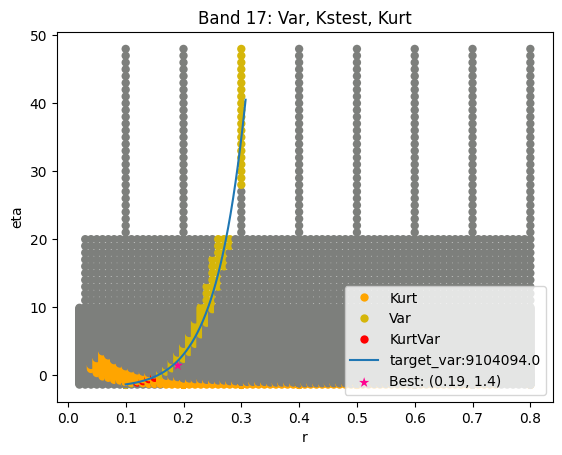

####
Band  20


100%|██████████| 55966/55966 [02:34<00:00, 363.29it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 5967000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


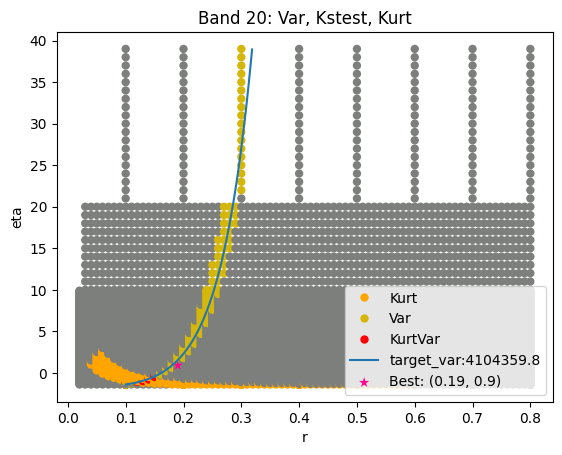

####
Band  23


100%|██████████| 55966/55966 [02:33<00:00, 363.89it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 13887000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


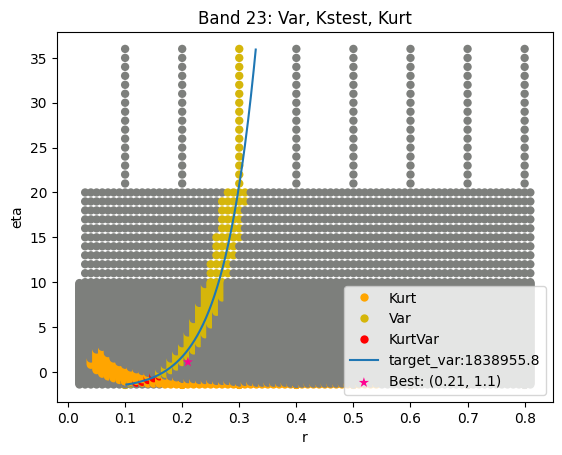

####
Band  26


100%|██████████| 55966/55966 [02:33<00:00, 364.42it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 31968000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


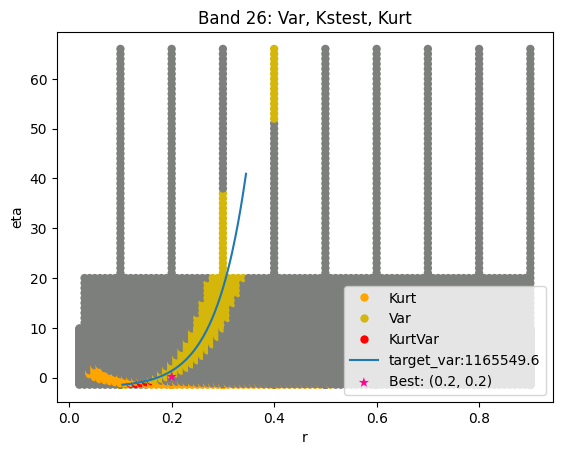

####
Band  29


100%|██████████| 55966/55966 [02:32<00:00, 366.08it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 73701000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


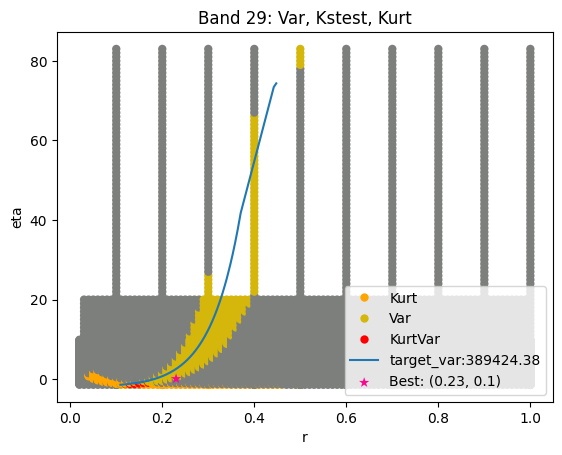

####
Band  32


100%|██████████| 55966/55966 [02:34<00:00, 362.84it/s]


Finding Minimum after computing 55966 CDFs
Number of samples: 100000, Without approximation : 59634000.0


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


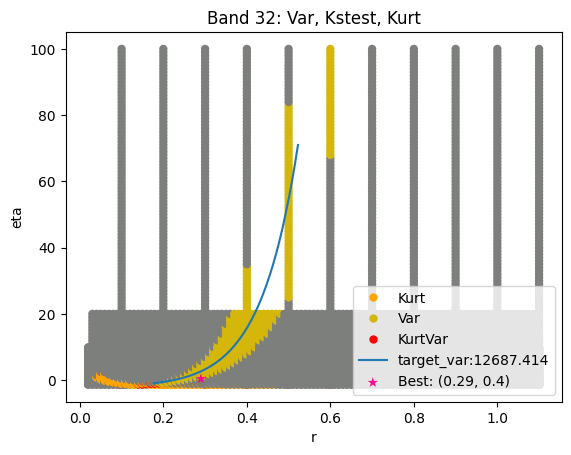

obs_var     var_lower     var_upper     obs_kurt  kurt_lower  \
band                                                                      
2     4.431448e+08  2.040596e+08  1.172903e+09   1951.21090   93.389990   
5     2.425320e+08  1.167651e+08  6.376787e+08   1732.74070  102.459850   
8     7.509878e+07  4.135542e+07  1.652329e+08    997.55035   76.816630   
11    6.680555e+07  1.909183e+07  4.286987e+08  13976.00800   62.877470   
14    1.964670e+07  9.259367e+06  7.427187e+07   4449.84300   48.653390   
17    9.104094e+06  4.527121e+06  3.404876e+07   4455.63230   42.402900   
20    4.104360e+06  2.023371e+06  1.352017e+07   3024.86230   61.902660   
23    1.838956e+06  6.761338e+05  1.053360e+07  11453.02000   71.847640   
26    1.165550e+06  2.007962e+05  1.103753e+07  27543.82800   79.598564   
29    3.894244e+05  2.562034e+04  3.816464e+06  38067.58200  100.885220   
32    1.268741e+04  2.705703e+03  7.869186e+04  13939.49500   95.461980   

      kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                           
2      3809.4540        45000.0       0.16          1.1             0.011800   
5      3959.4731       117000.0       0.17          1.5             0.011201   
8      2699.5813       189000.0       0.17          1.1             0.006731   
11     8349.7330       495000.0       0.18          1.4             0.006411   
14     6157.9995      1134000.0       0.19          1.7             0.006926   
17     6093.3640      2574000.0       0.19          1.4             0.008478   
20     4879.5195      5967000.0       0.19          0.9             0.005827   
23     7815.2046     13887000.0       0.21          1.1             0.010091   
26     9199.3900     31968000.0       0.20          0.2             0.007970   
29     9678.4180     73701000.0       0.23          0.1             0.010788   
32     8480.3460     59634000.0       0.29          0.4             0.010367   

      kstest_stat_cutoff_0.05  
band                           
2                    0.006398  
5                    0.003969  
8                    0.003123  
11                   0.001930  
14                   0.001275  
17                   0.000846  
20                   0.000556  
23                   0.000364  
26                   0.000240  
29                   0.000158  
32                   0.000176

In [10]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
group_cdf_df_dict_path = Path(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

if RERUN or not master_df_combo_path.exists() or not group_cdf_df_dict_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
    pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(group_cdf_df_dict_path)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

In [11]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))
if RERUN or not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            best_params_eta0.append(best_param_eta0[0])
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            best_params_eta0.append(master_df.loc[group, 'initial_r'])
    master_df['best_r_eta0'] = best_params_eta0
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

100%|██████████| 369/369 [00:00<00:00, 582.76it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 350.17it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 363.39it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 367.09it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 365.11it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 365.65it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 366.43it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 325.96it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 367.62it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:00<00:00, 369.48it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 354.97it/s]


Finding Minimum after computing 369 CDFs


obs_var     var_lower     var_upper     obs_kurt  kurt_lower  \
band                                                                      
2     4.431448e+08  2.040596e+08  1.172903e+09   1951.21090   93.389990   
5     2.425320e+08  1.167651e+08  6.376787e+08   1732.74070  102.459850   
8     7.509878e+07  4.135542e+07  1.652329e+08    997.55035   76.816630   
11    6.680555e+07  1.909183e+07  4.286987e+08  13976.00800   62.877470   
14    1.964670e+07  9.259367e+06  7.427187e+07   4449.84300   48.653390   
17    9.104094e+06  4.527121e+06  3.404876e+07   4455.63230   42.402900   
20    4.104360e+06  2.023371e+06  1.352017e+07   3024.86230   61.902660   
23    1.838956e+06  6.761338e+05  1.053360e+07  11453.02000   71.847640   
26    1.165550e+06  2.007962e+05  1.103753e+07  27543.82800   79.598564   
29    3.894244e+05  2.562034e+04  3.816464e+06  38067.58200  100.885220   
32    1.268741e+04  2.705703e+03  7.869186e+04  13939.49500   95.461980   

      kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                           
2      3809.4540        45000.0       0.16          1.1             0.011800   
5      3959.4731       117000.0       0.17          1.5             0.011201   
8      2699.5813       189000.0       0.17          1.1             0.006731   
11     8349.7330       495000.0       0.18          1.4             0.006411   
14     6157.9995      1134000.0       0.19          1.7             0.006926   
17     6093.3640      2574000.0       0.19          1.4             0.008478   
20     4879.5195      5967000.0       0.19          0.9             0.005827   
23     7815.2046     13887000.0       0.21          1.1             0.010091   
26     9199.3900     31968000.0       0.20          0.2             0.007970   
29     9678.4180     73701000.0       0.23          0.1             0.010788   
32     8480.3460     59634000.0       0.29          0.4             0.010367   

      kstest_stat_cutoff_0.05  kstest_stat_eta0  best_r_eta0  
band                                                          
2                    0.006398          0.064579         0.14  
5                    0.003969          0.026640         0.14  
8                    0.003123          0.073398         0.15  
11                   0.001930          0.039362         0.15  
14                   0.001275          0.045339         0.15  
17                   0.000846          0.044812         0.16  
20                   0.000556          0.055876         0.17  
23                   0.000364          0.043248         0.18  
26                   0.000240          0.021176         0.19  
29                   0.000158          0.019530         0.23  
32                   0.000176          0.022571         0.27

In [12]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Band 2


100%|██████████| 999/999 [00:01<00:00, 800.12it/s]


Finding Minimum after computing 999 CDFs
Iter 1 band 2 best parameters: ((0.16, 1.156), 0.005890352966071377)


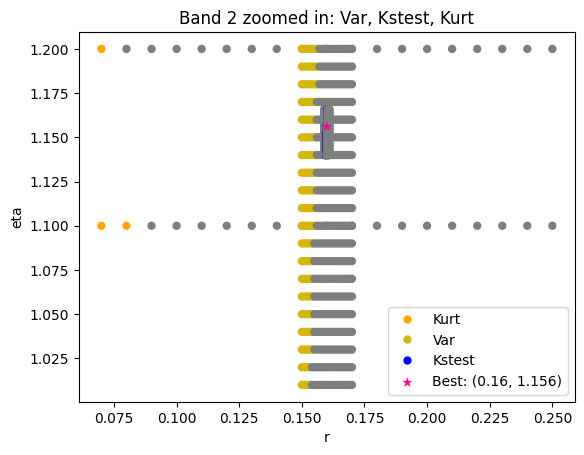

Band 5


100%|██████████| 1317/1317 [00:03<00:00, 368.45it/s]


Finding Minimum after computing 1317 CDFs
Iter 1 band 5 best parameters: ((0.1686, 1.387), 0.00766173225639763)


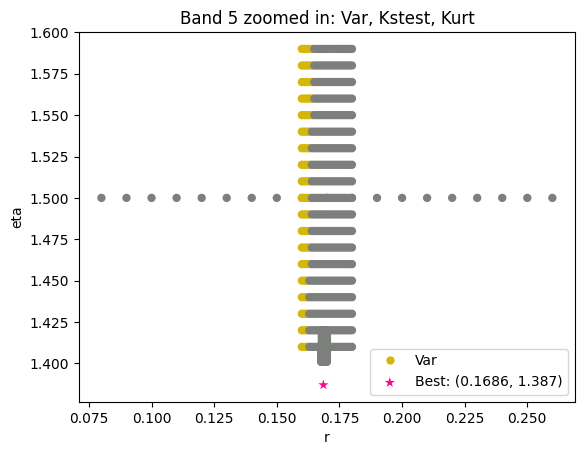

Band 8


100%|██████████| 1153/1153 [00:03<00:00, 368.80it/s]


Finding Minimum after computing 1153 CDFs
Iter 1 band 8 best parameters: ((0.1707, 1.152), 0.004653509647285836)


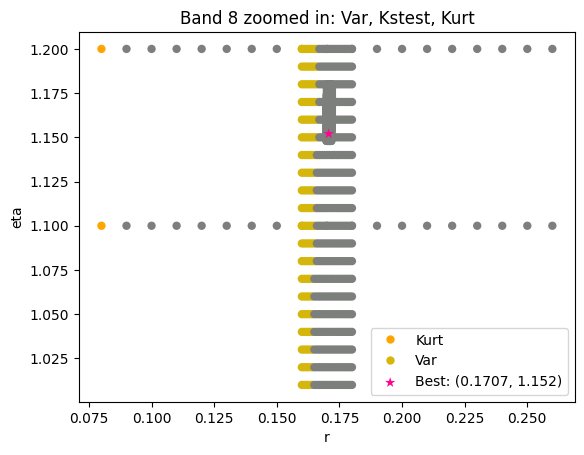

Band 11


100%|██████████| 1208/1208 [00:03<00:00, 368.52it/s]


Finding Minimum after computing 1208 CDFs
Iter 1 band 11 best parameters: ((0.1777, 1.296), 0.003857599963433267)


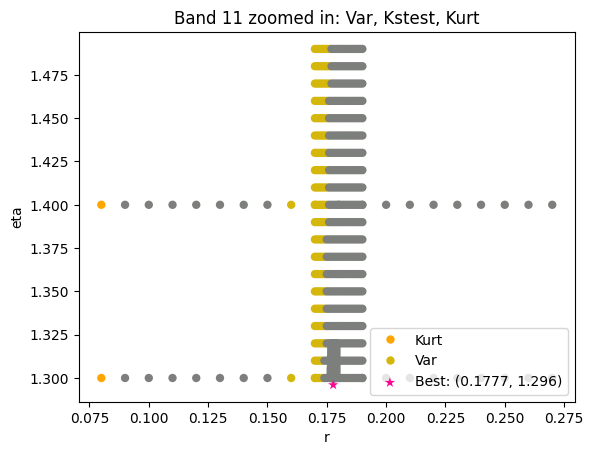

Band 14


100%|██████████| 1173/1173 [00:03<00:00, 363.90it/s]


Finding Minimum after computing 1173 CDFs
Iter 1 band 14 best parameters: ((0.1877, 1.611), 0.0043053701813968726)


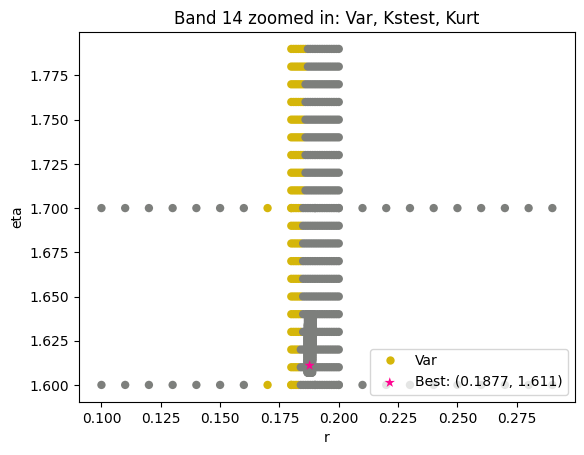

Band 17


100%|██████████| 1155/1155 [00:03<00:00, 360.04it/s]


Finding Minimum after computing 1155 CDFs
Iter 1 band 17 best parameters: ((0.1887, 1.292), 0.003212121170238502)


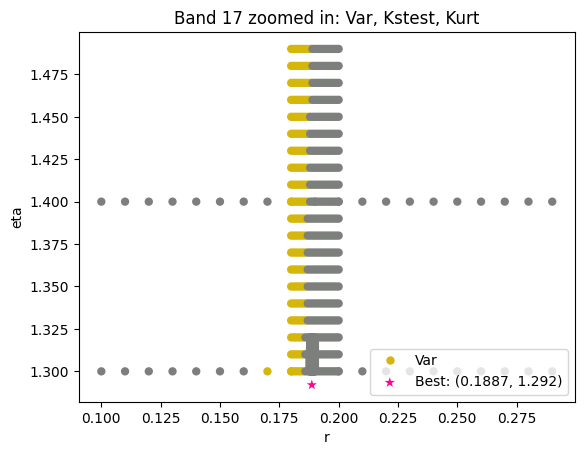

Band 20


100%|██████████| 893/893 [00:02<00:00, 364.34it/s]


Finding Minimum after computing 893 CDFs
Iter 1 band 20 best parameters: ((0.1921, 0.981), 0.0031296498173895015)


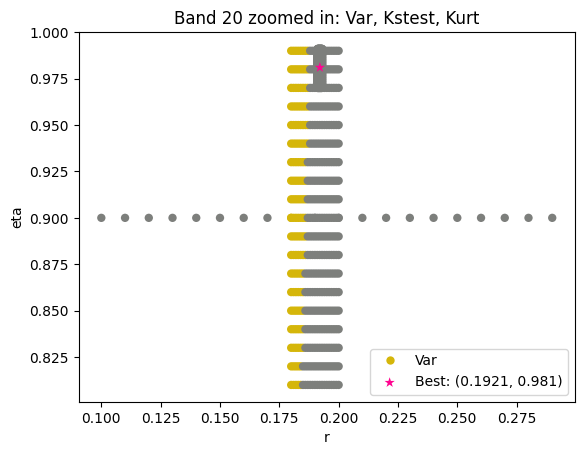

Band 23


100%|██████████| 1048/1048 [00:02<00:00, 367.42it/s]


Finding Minimum after computing 1048 CDFs
Iter 1 band 23 best parameters: ((0.2066, 1.024), 0.005893802278979288)


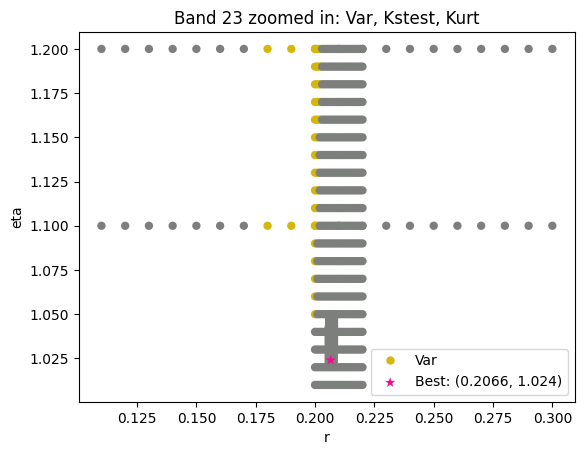

Band 26


100%|██████████| 1108/1108 [00:02<00:00, 369.42it/s]


Finding Minimum after computing 1108 CDFs
Iter 1 band 26 best parameters: ((0.2045, 0.318), 0.005718933614389299)


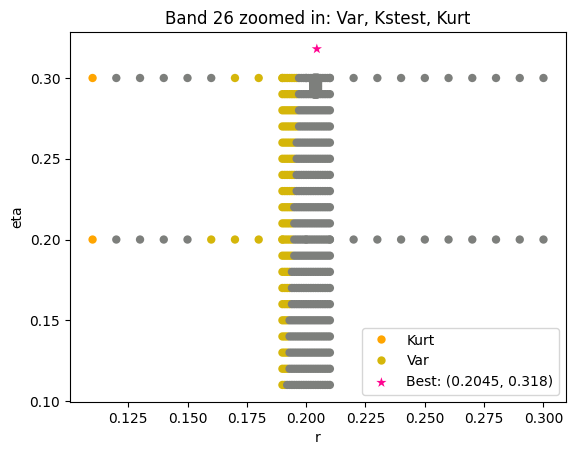

Band 29


100%|██████████| 1122/1122 [00:03<00:00, 364.76it/s]


Finding Minimum after computing 1122 CDFs
Iter 1 band 29 best parameters: ((0.2252, -0.004), 0.007911712630376821)


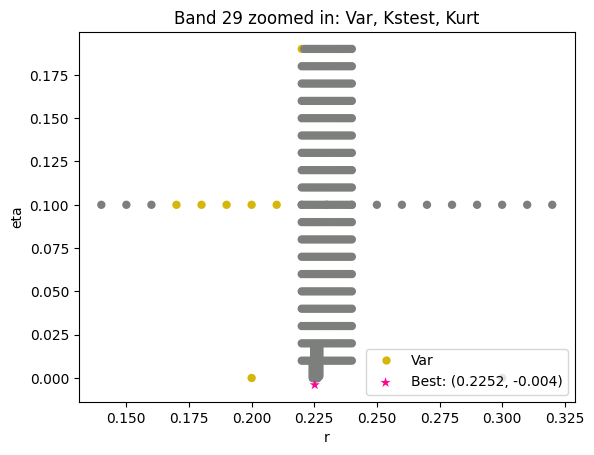

Band 32
(0.282, 0.39), 50 of 440
(0.284, 0.49), 100 of 440
(0.287, 0.39), 150 of 440
(0.289, 0.49), 200 of 440
(0.292, 0.39), 250 of 440
(0.294, 0.49), 300 of 440
(0.297, 0.39), 350 of 440
(0.299, 0.49), 400 of 440


100%|██████████| 420/420 [00:01<00:00, 358.88it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 32 best parameters: ((0.285, 0.3), 0.009644795704746065)


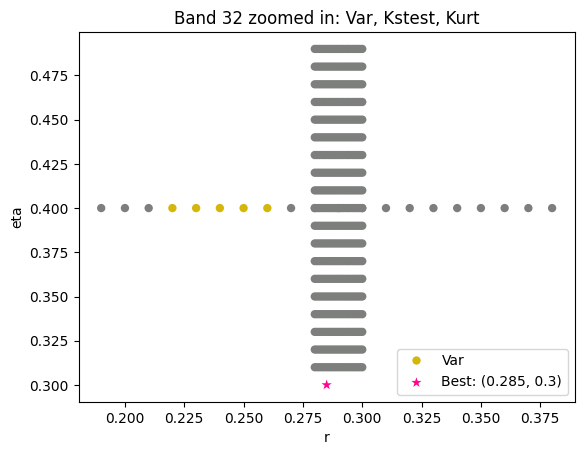

obs_var     var_lower     var_upper     obs_kurt  kurt_lower  \
band                                                                      
2     4.431448e+08  2.040596e+08  1.172903e+09   1951.21090   93.389990   
5     2.425320e+08  1.167651e+08  6.376787e+08   1732.74070  102.459850   
8     7.509878e+07  4.135542e+07  1.652329e+08    997.55035   76.816630   
11    6.680555e+07  1.909183e+07  4.286987e+08  13976.00800   62.877470   
14    1.964670e+07  9.259367e+06  7.427187e+07   4449.84300   48.653390   
17    9.104094e+06  4.527121e+06  3.404876e+07   4455.63230   42.402900   
20    4.104360e+06  2.023371e+06  1.352017e+07   3024.86230   61.902660   
23    1.838956e+06  6.761338e+05  1.053360e+07  11453.02000   71.847640   
26    1.165550e+06  2.007962e+05  1.103753e+07  27543.82800   79.598564   
29    3.894244e+05  2.562034e+04  3.816464e+06  38067.58200  100.885220   
32    1.268741e+04  2.705703e+03  7.869186e+04  13939.49500   95.461980   

      kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                           
2      3809.4540        45000.0       0.16          1.1             0.011800   
5      3959.4731       117000.0       0.17          1.5             0.011201   
8      2699.5813       189000.0       0.17          1.1             0.006731   
11     8349.7330       495000.0       0.18          1.4             0.006411   
14     6157.9995      1134000.0       0.19          1.7             0.006926   
17     6093.3640      2574000.0       0.19          1.4             0.008478   
20     4879.5195      5967000.0       0.19          0.9             0.005827   
23     7815.2046     13887000.0       0.21          1.1             0.010091   
26     9199.3900     31968000.0       0.20          0.2             0.007970   
29     9678.4180     73701000.0       0.23          0.1             0.010788   
32     8480.3460     59634000.0       0.29          0.4             0.010367   

      kstest_stat_cutoff_0.05  kstest_stat_eta0  best_r_eta0  best_r  \
band                                                                   
2                    0.006398          0.064579         0.14  0.1600   
5                    0.003969          0.026640         0.14  0.1686   
8                    0.003123          0.073398         0.15  0.1707   
11                   0.001930          0.039362         0.15  0.1777   
14                   0.001275          0.045339         0.15  0.1877   
17                   0.000846          0.044812         0.16  0.1887   
20                   0.000556          0.055876         0.17  0.1921   
23                   0.000364          0.043248         0.18  0.2066   
26                   0.000240          0.021176         0.19  0.2045   
29                   0.000158          0.019530         0.23  0.2252   
32                   0.000176          0.022571         0.27  0.2850   

      best_eta  kstest_stat_best  iter1_r  iter1_eta  kstest_stat_iter1  \
band                                                                      
2        1.156          0.005890   0.1600      1.156           0.005890   
5        1.387          0.007662   0.1686      1.387           0.007662   
8        1.152          0.004654   0.1707      1.152           0.004654   
11       1.296          0.003858   0.1777      1.296           0.003858   
14       1.611          0.004305   0.1877      1.611           0.004305   
17       1.292          0.003212   0.1887      1.292           0.003212   
20       0.981          0.003130   0.1921      0.981           0.003130   
23       1.024          0.005894   0.2066      1.024           0.005894   
26       0.318          0.005719   0.2045      0.318           0.005719   
29      -0.004          0.007912   0.2252     -0.004           0.007912   
32       0.300          0.009645   0.2850      0.300           0.009645   

      n_pval_0.05  
band               
2           50625  
5           32905  
8

In [13]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(-1, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group]
            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

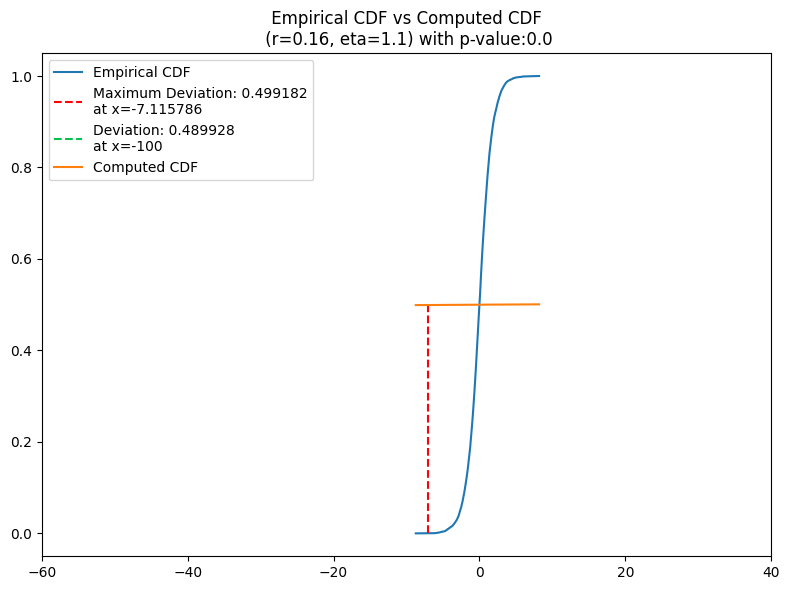

In [14]:
# Example Cell
group = 2
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

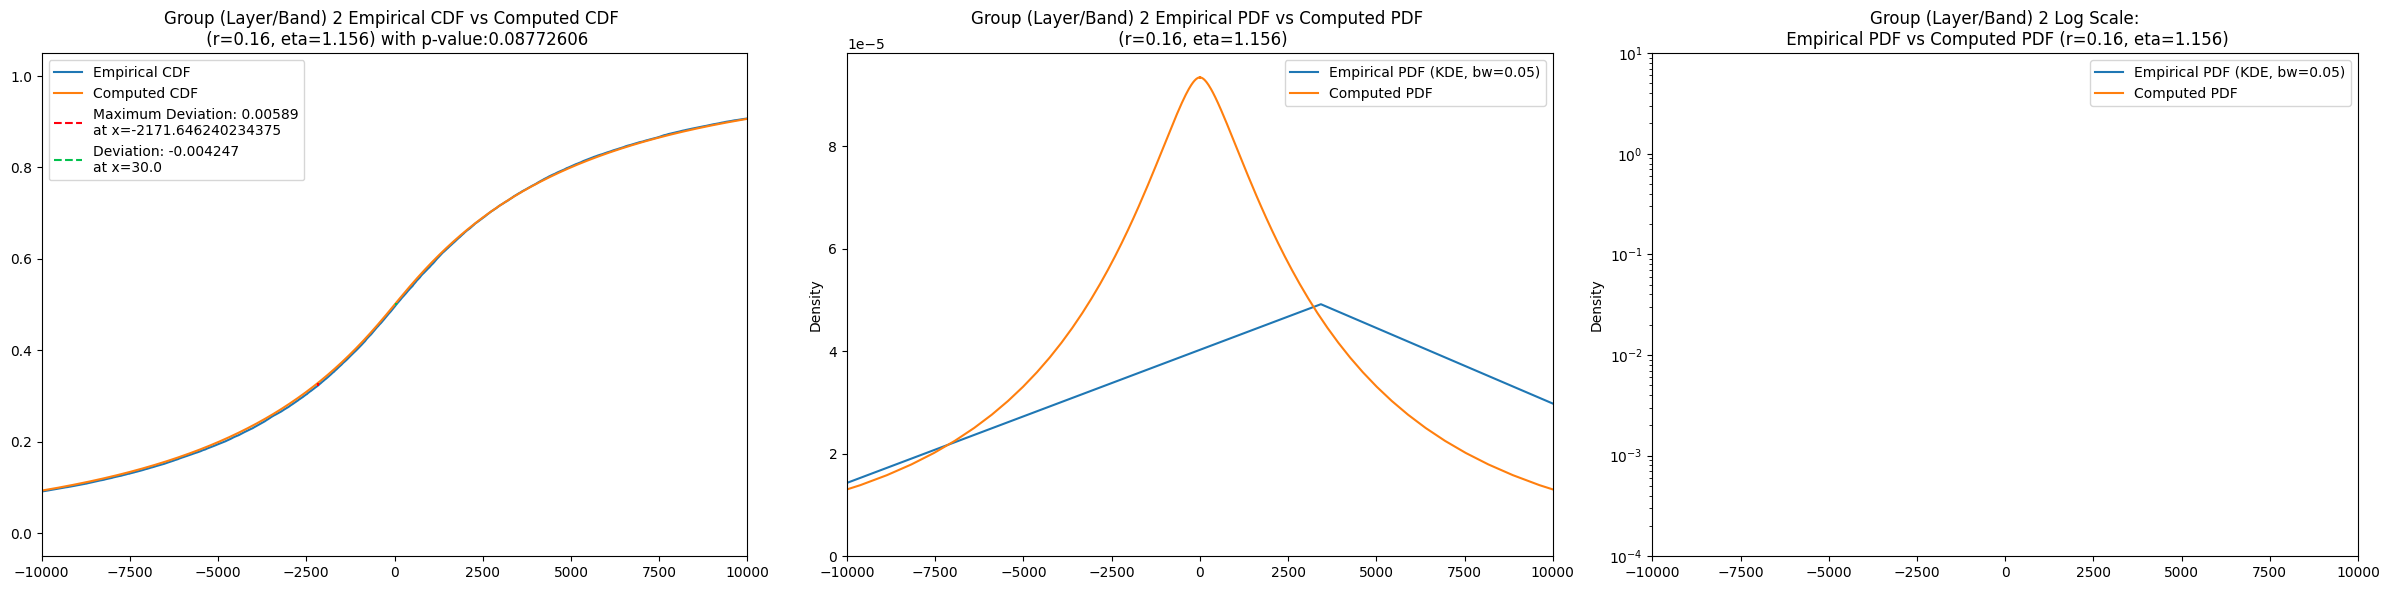

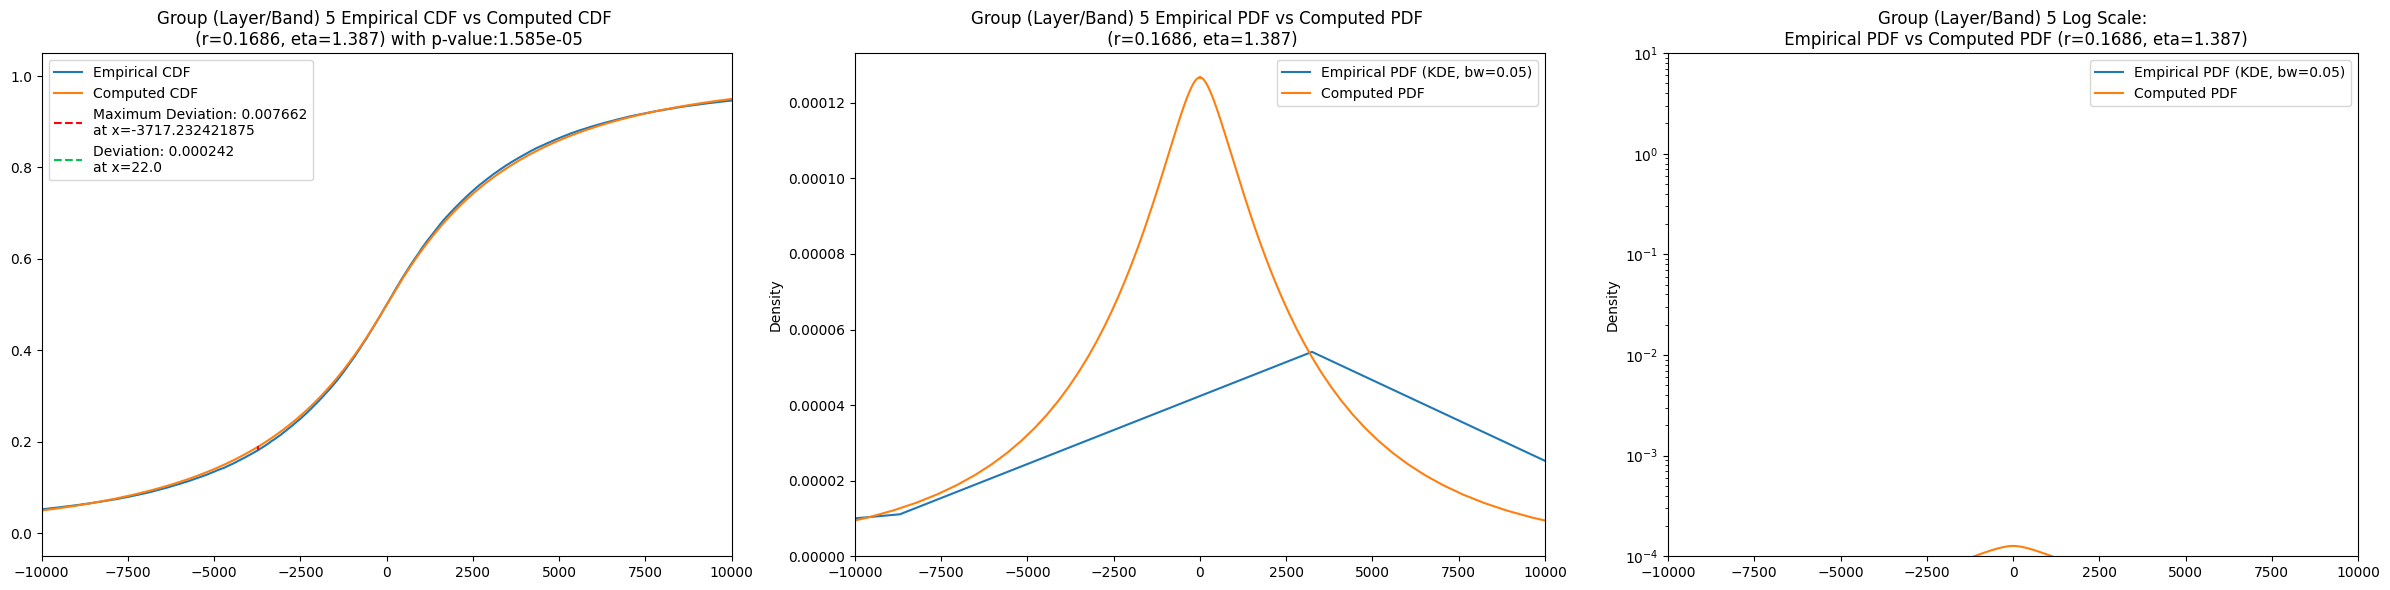

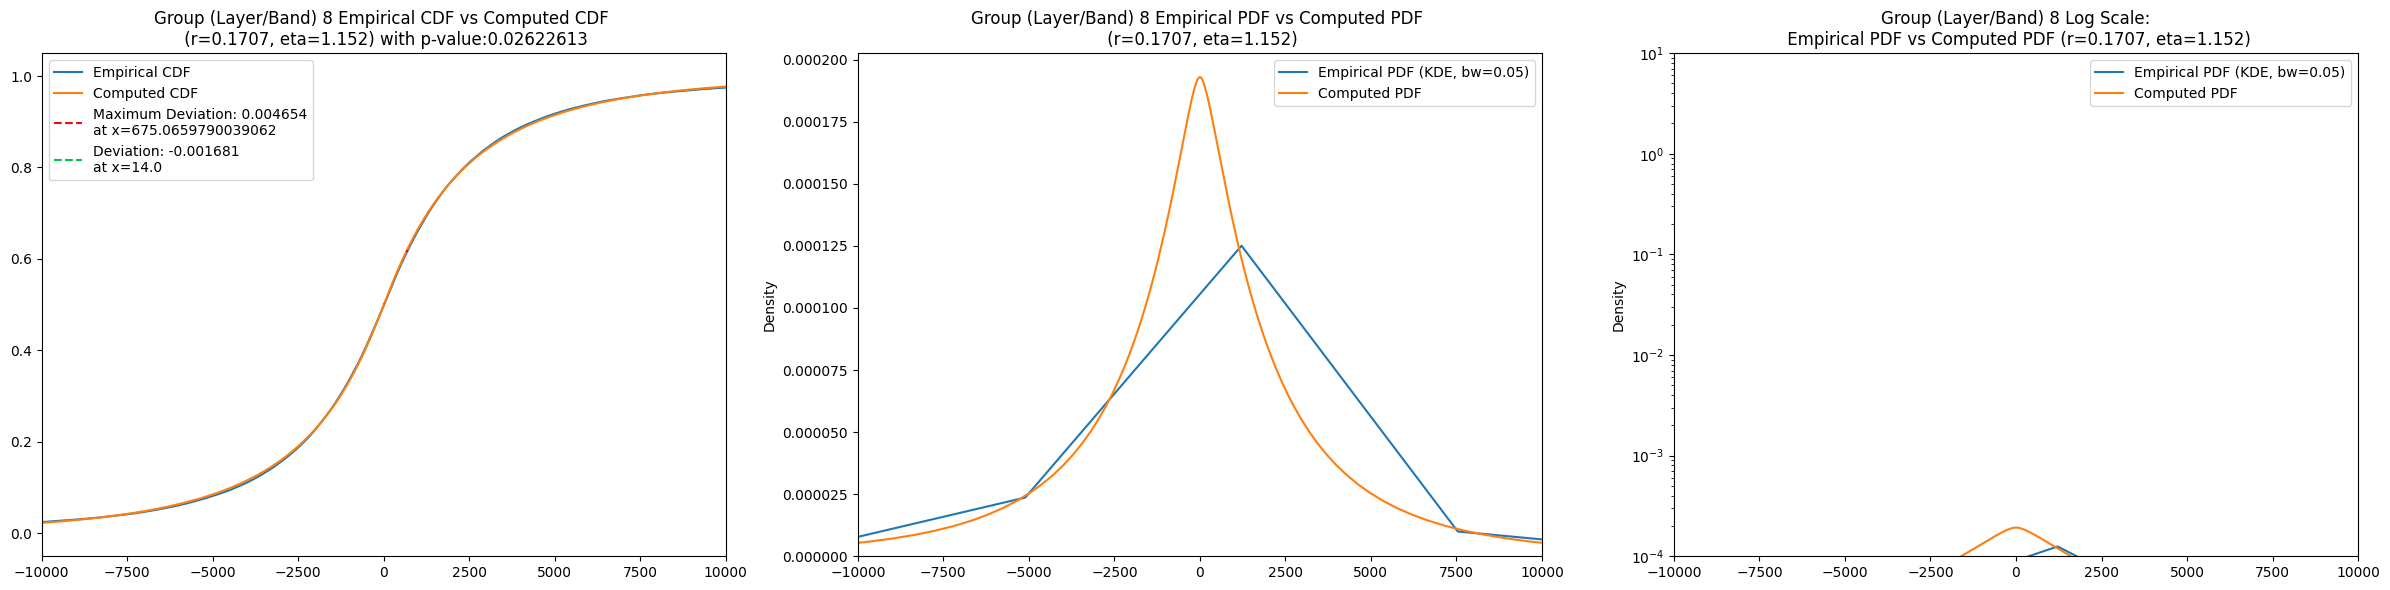

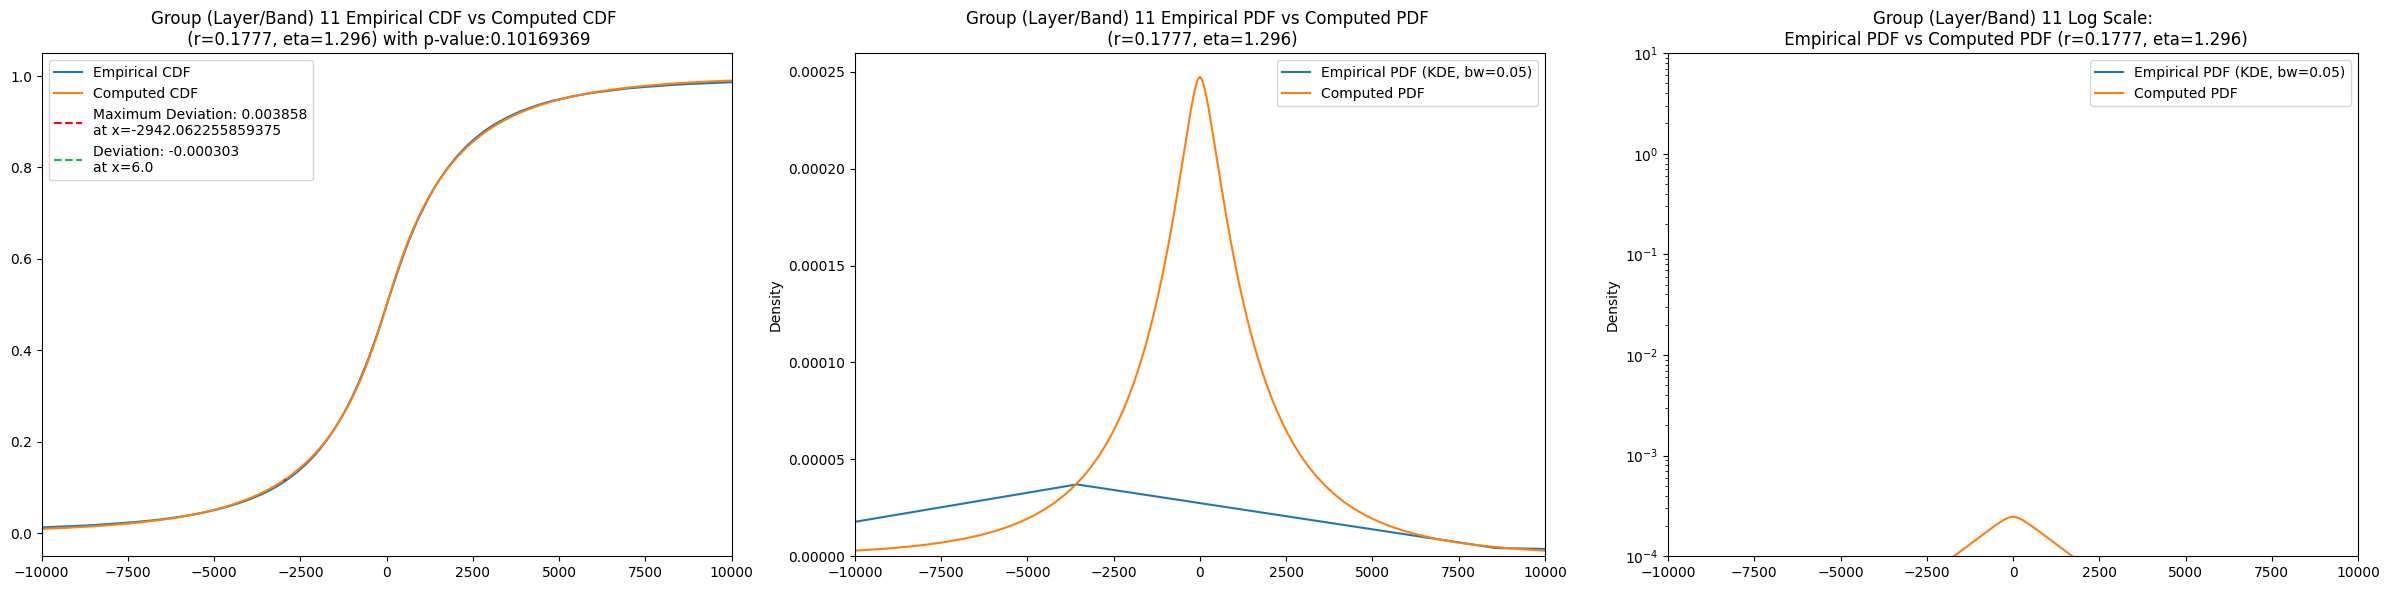

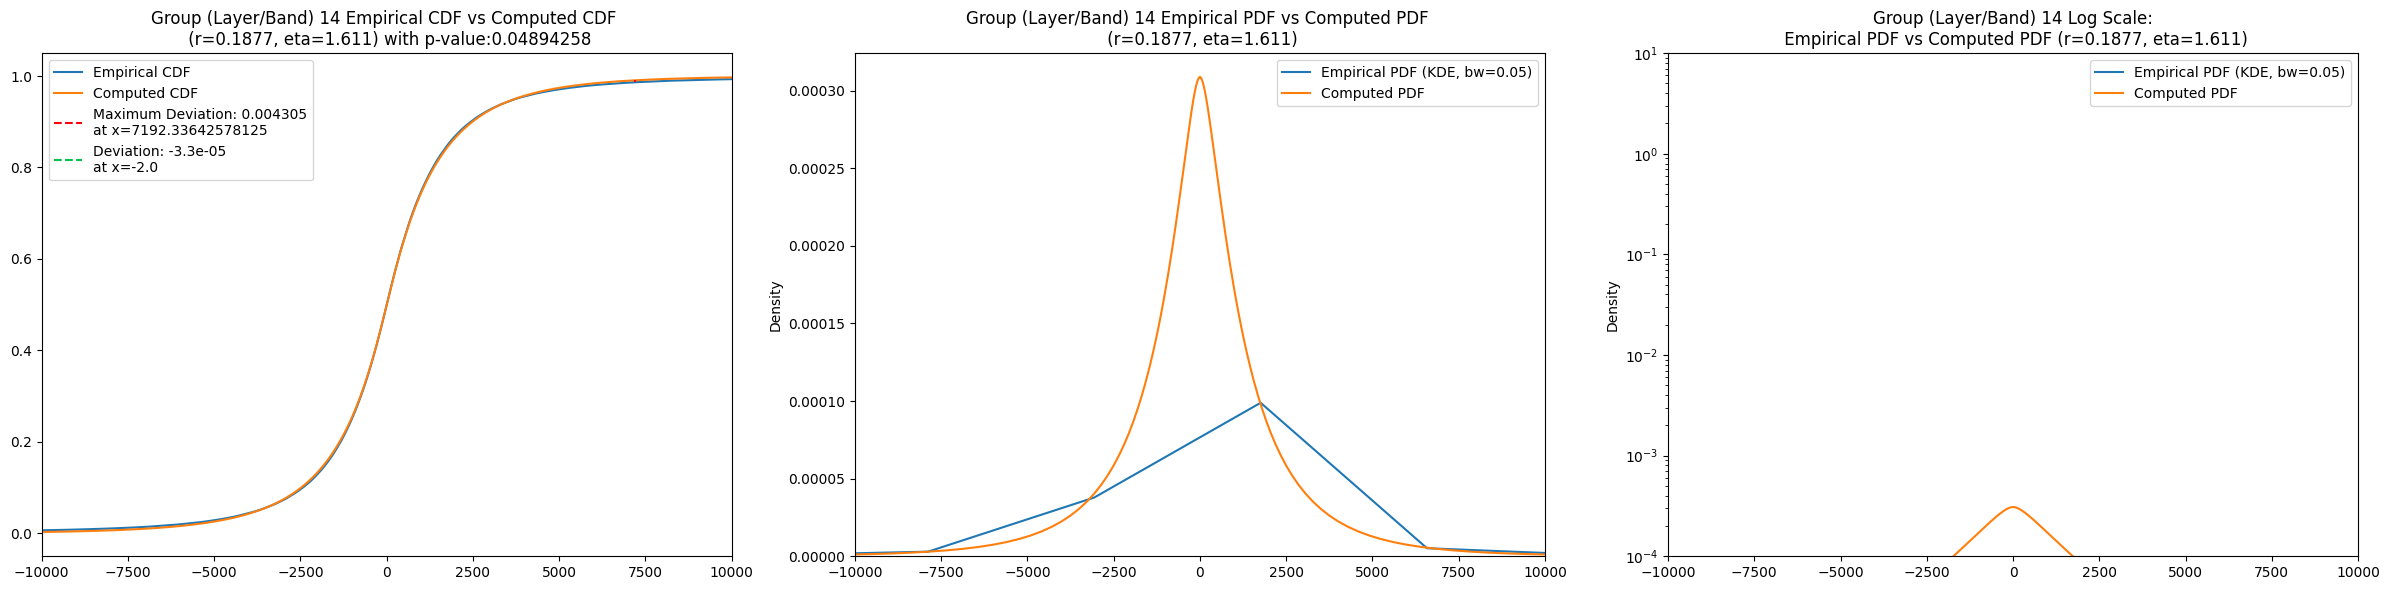

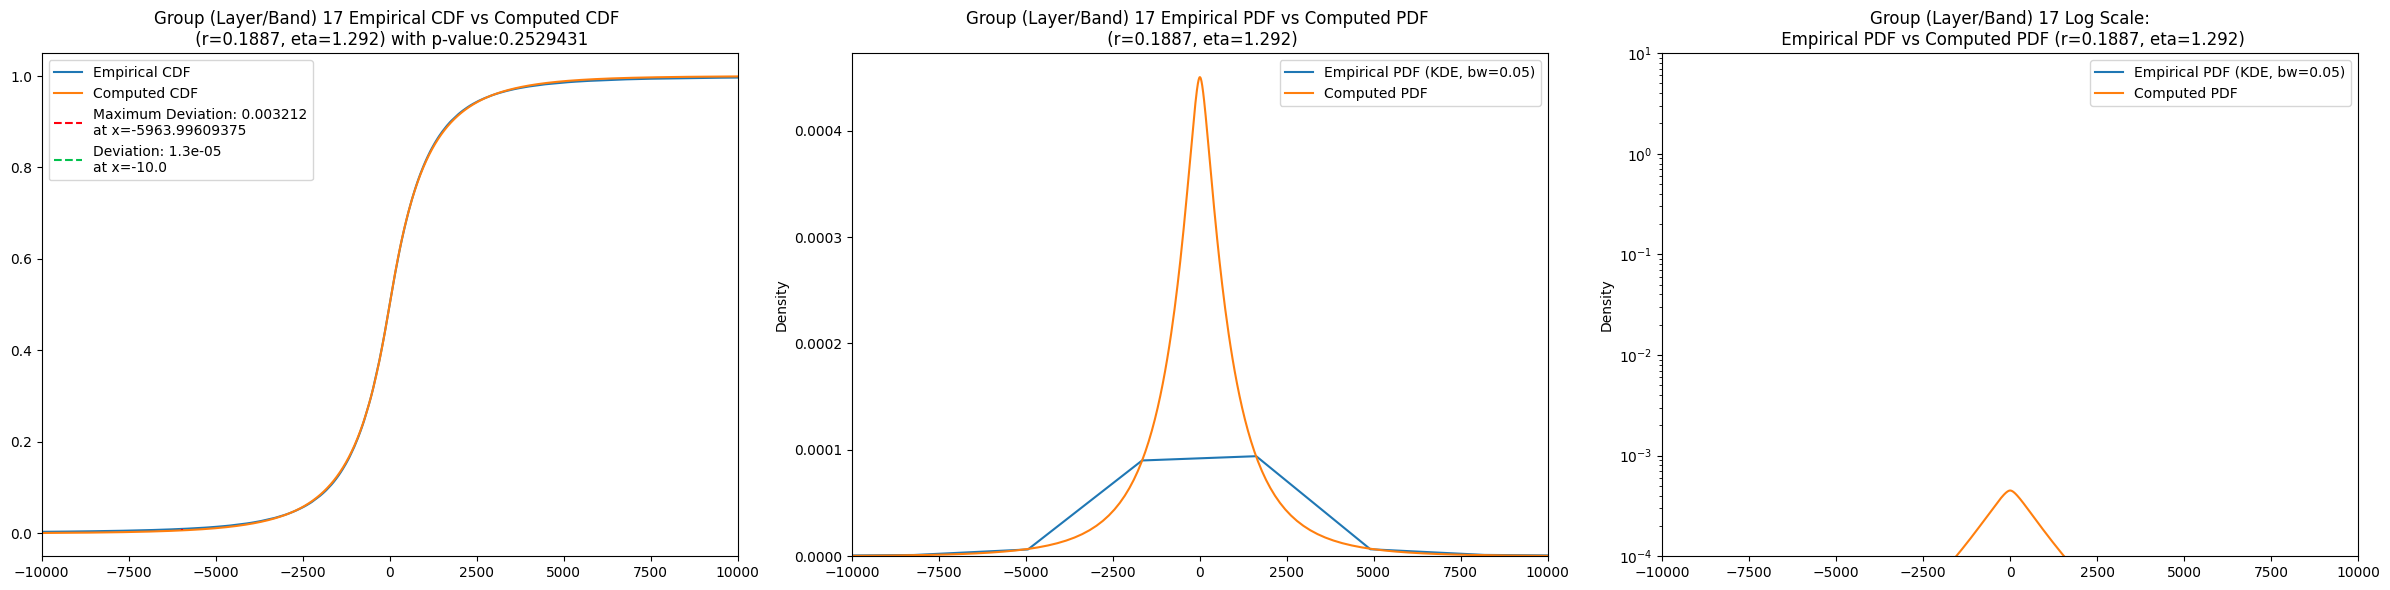

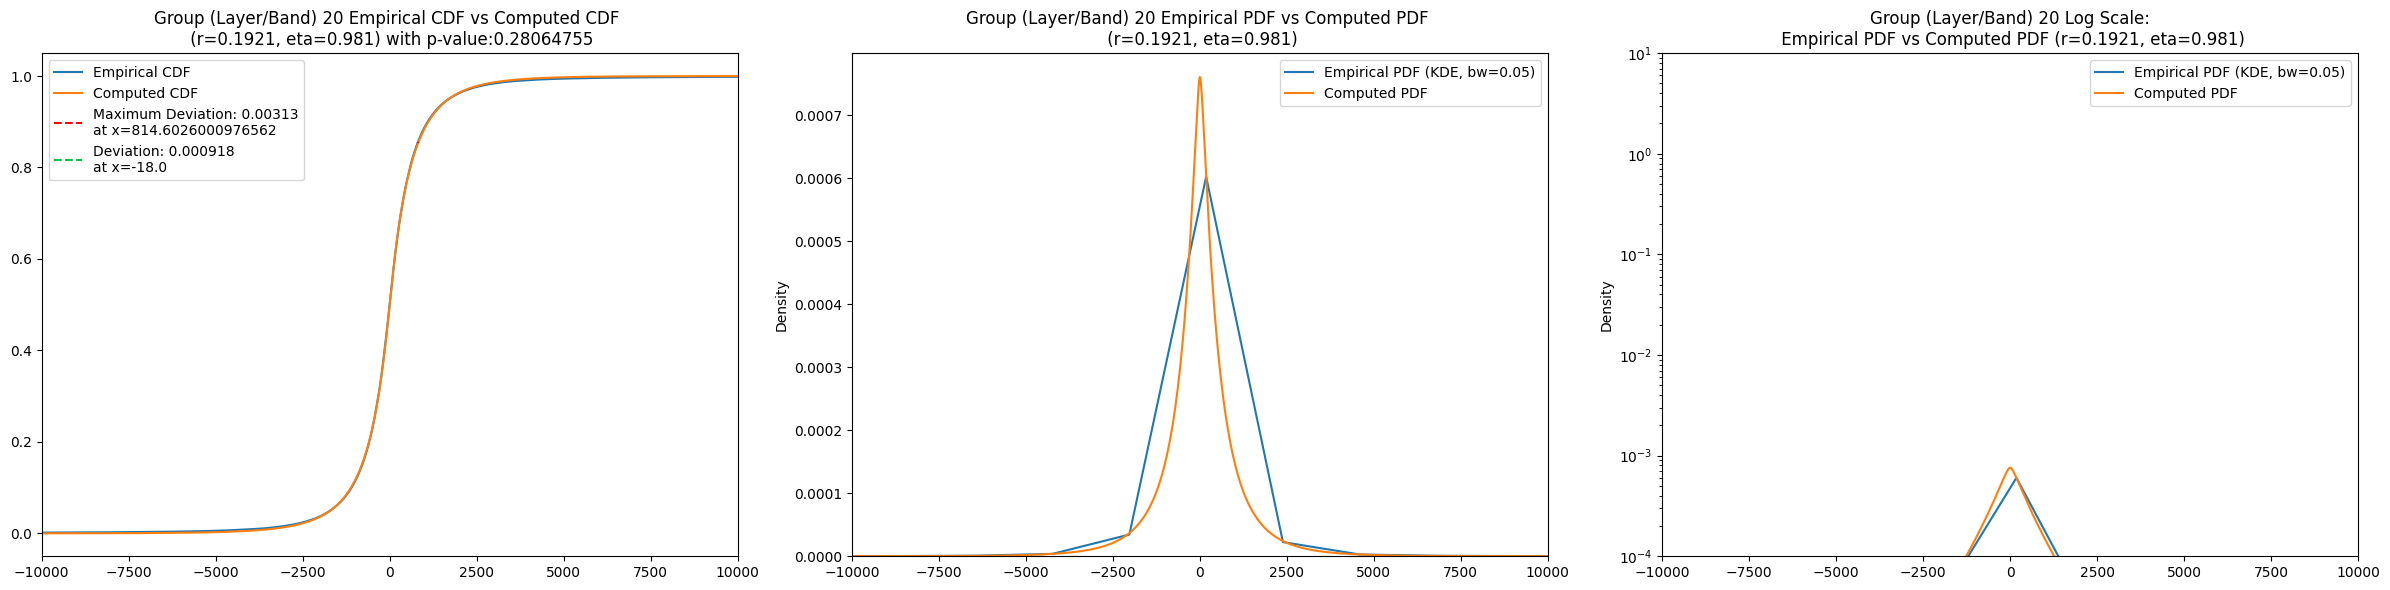

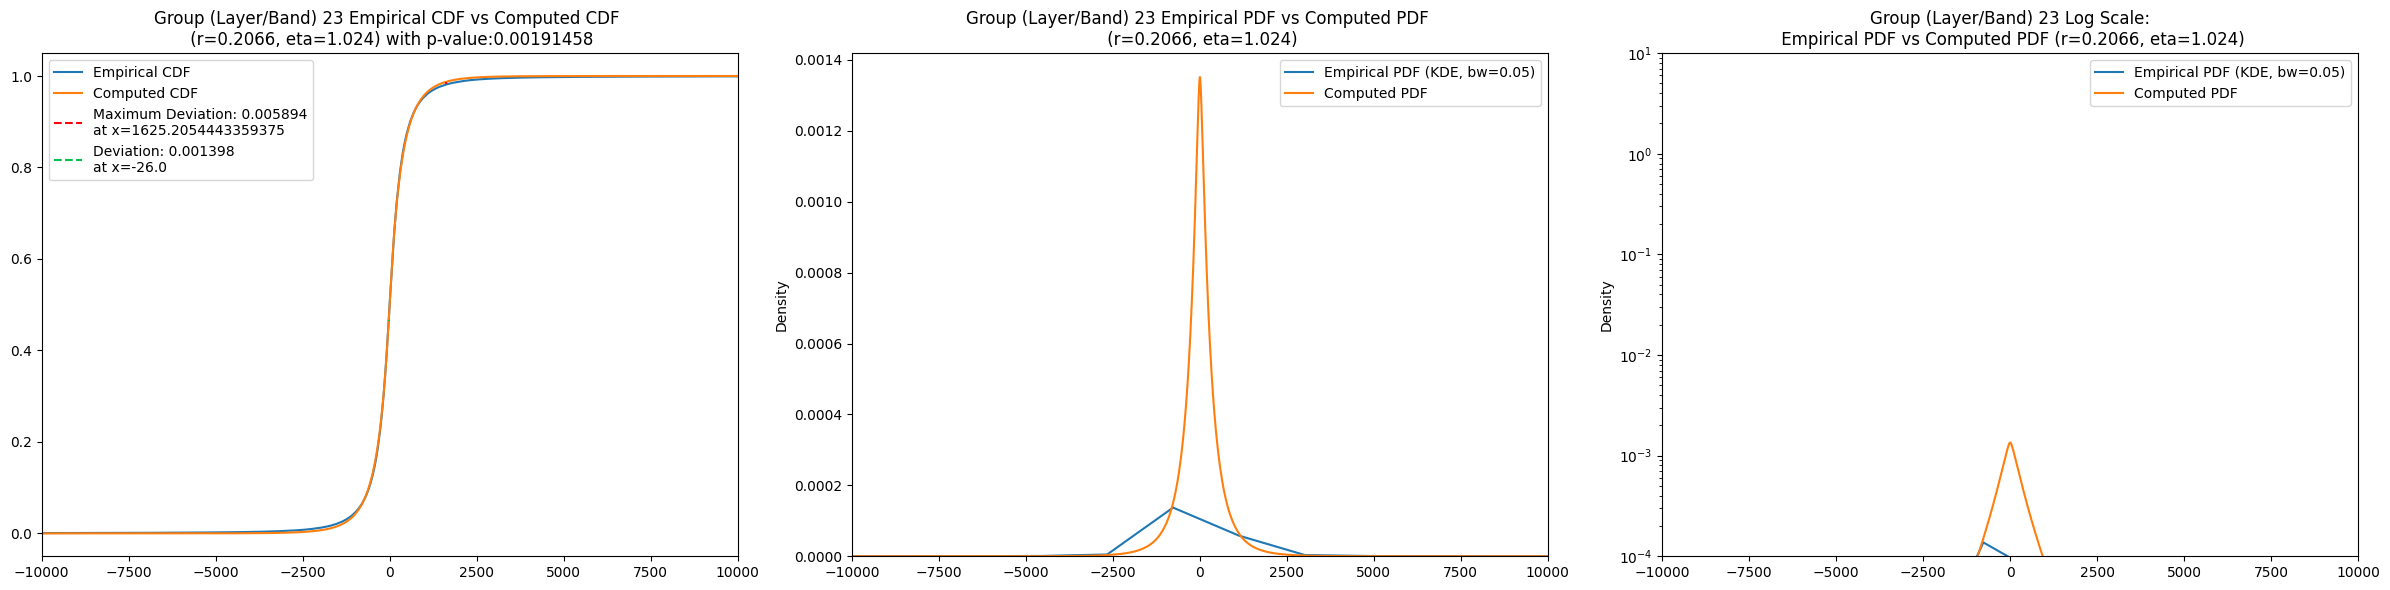

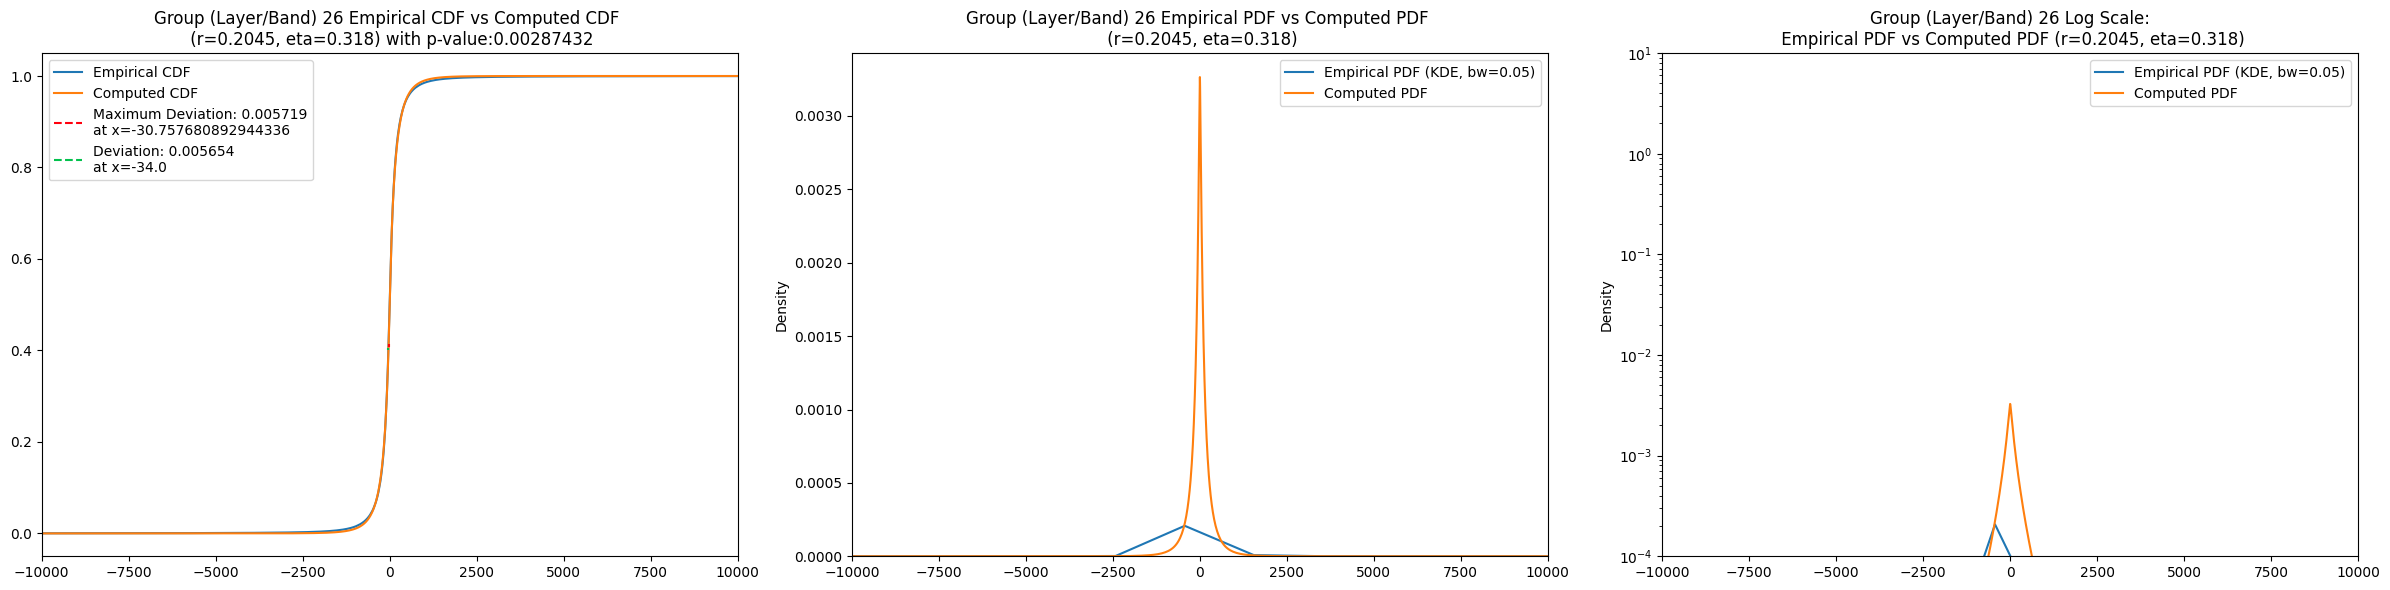

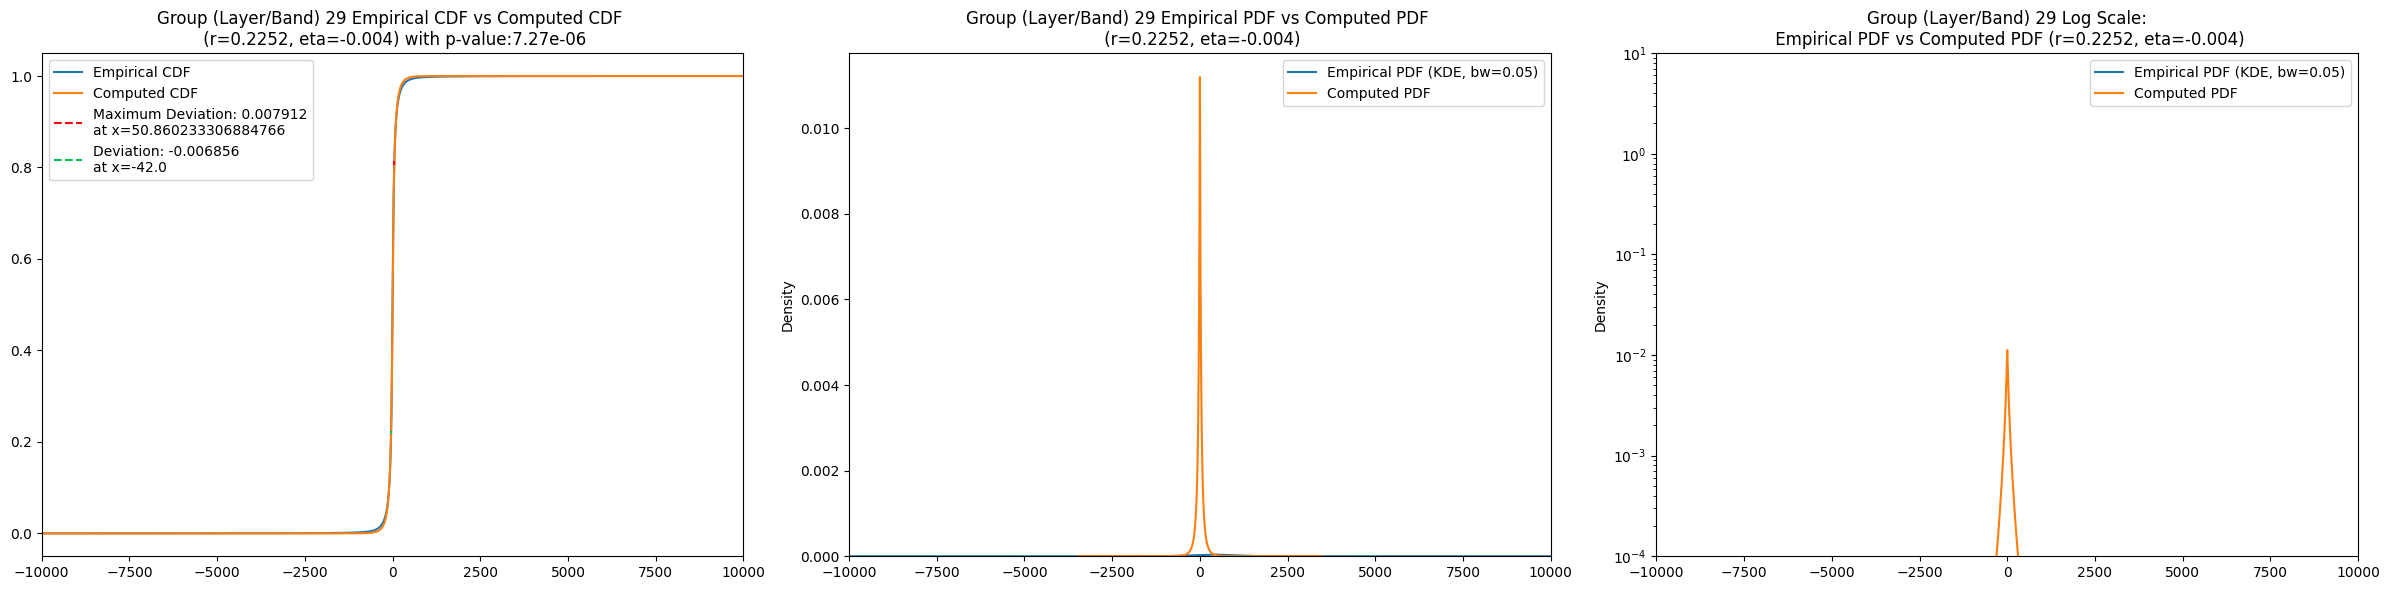

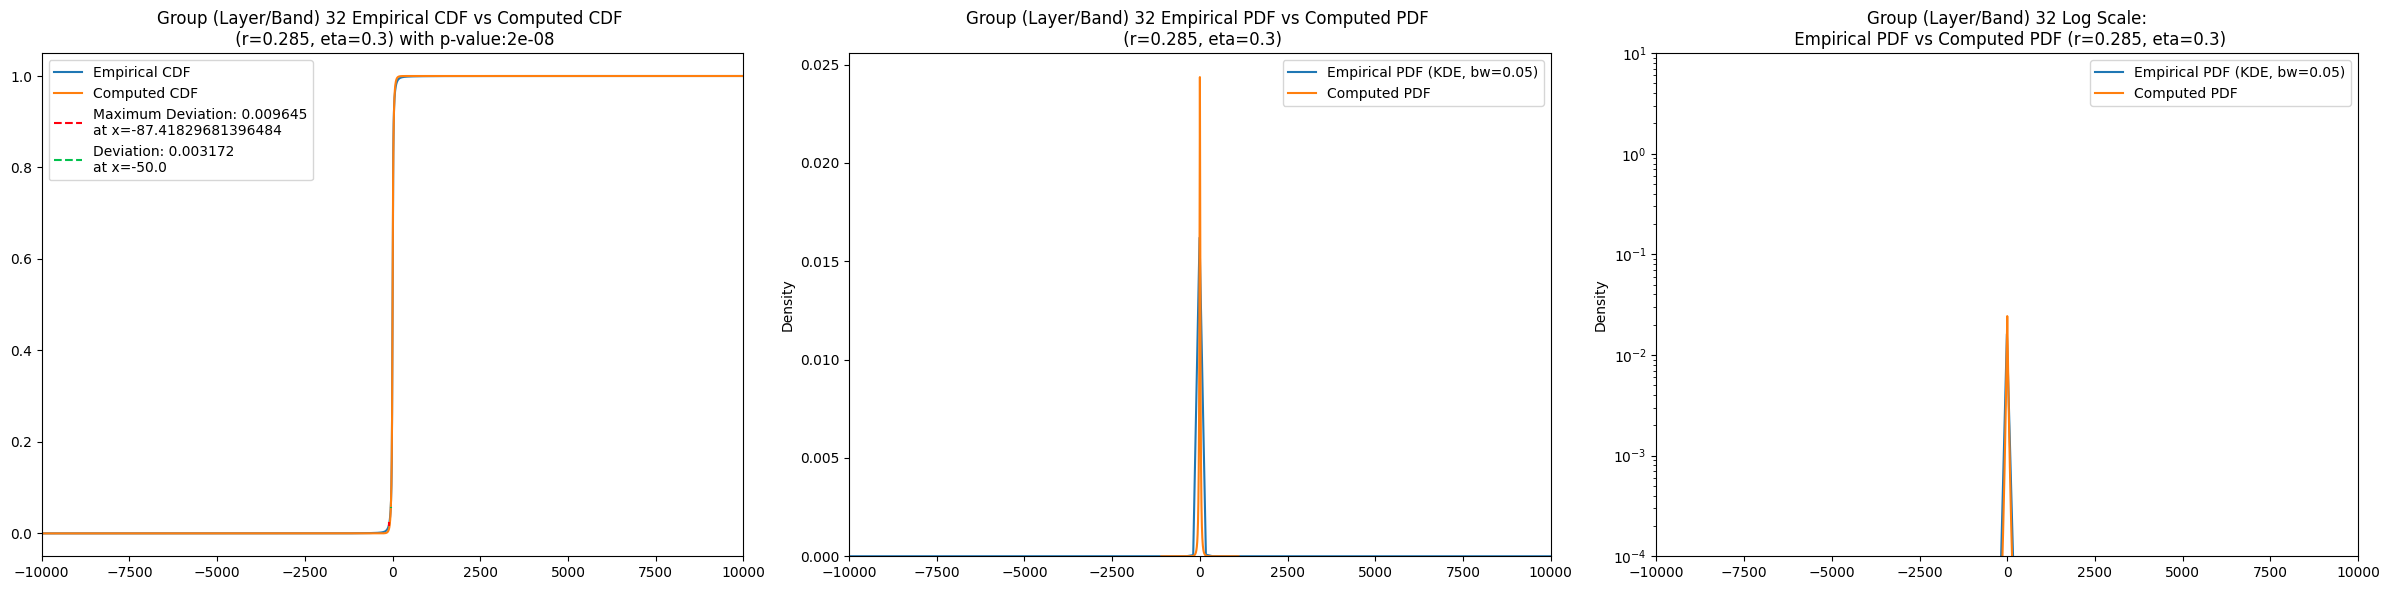

In [15]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-10000, 10000), #(-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [16]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [17]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var     var_lower     var_upper     obs_kurt  kurt_lower  \
band                                                                      
2     4.431448e+08  2.040596e+08  1.172903e+09   1951.21090   93.389990   
5     2.425320e+08  1.167651e+08  6.376787e+08   1732.74070  102.459850   
8     7.509878e+07  4.135542e+07  1.652329e+08    997.55035   76.816630   
11    6.680555e+07  1.909183e+07  4.286987e+08  13976.00800   62.877470   
14    1.964670e+07  9.259367e+06  7.427187e+07   4449.84300   48.653390   
17    9.104094e+06  4.527121e+06  3.404876e+07   4455.63230   42.402900   
20    4.104360e+06  2.023371e+06  1.352017e+07   3024.86230   61.902660   
23    1.838956e+06  6.761338e+05  1.053360e+07  11453.02000   71.847640   
26    1.165550e+06  2.007962e+05  1.103753e+07  27543.82800   79.598564   
29    3.894244e+05  2.562034e+04  3.816464e+06  38067.58200  100.885220   
32    1.268741e+04  2.705703e+03  7.869186e+04  13939.49500   95.461980   

      kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                           
2      3809.4540        45000.0       0.16          1.1             0.011800   
5      3959.4731       117000.0       0.17          1.5             0.011201   
8      2699.5813       189000.0       0.17          1.1             0.006731   
11     8349.7330       495000.0       0.18          1.4             0.006411   
14     6157.9995      1134000.0       0.19          1.7             0.006926   
17     6093.3640      2574000.0       0.19          1.4             0.008478   
20     4879.5195      5967000.0       0.19          0.9             0.005827   
23     7815.2046     13887000.0       0.21          1.1             0.010091   
26     9199.3900     31968000.0       0.20          0.2             0.007970   
29     9678.4180     73701000.0       0.23          0.1             0.010788   
32     8480.3460     59634000.0       0.29          0.4             0.010367   

      ...  param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
band  ...                                                               
2     ...       6384.9600              0.044028          3.074840e-76   
5     ...       4468.0500              0.041173         8.895000e-173   
8     ...       3071.4600              0.037180         1.935400e-227   
11    ...       2326.5400              0.035271          0.000000e+00   
14    ...       1744.4800              0.034096          0.000000e+00   
17    ...       1243.7800              0.034877          0.000000e+00   
20    ...        768.4440              0.037194          0.000000e+00   
23    ...        418.3490              0.037800          0.000000e+00   
26    ...        202.3580              0.044217          0.000000e+00   
29    ...         64.0303              0.049811          0.000000e+00   
32    ...         24.4675              0.038347          0.000000e+00   

      param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
band                                                                       
2         5694.0500             0.018637         5.232690e-14  4473.4300   
5         3981.7600             0.016246         2.978560e-27  3137.8700   
8         2724.4100             0.012882         1.127140e-27  2168.5900   
11        2054.2700             0.010895         1.823320e-51  1646.1000   
14        1540.8400             0.009953         5.278280e-98  1238.7800   
17        1098.8200             0.009883        8.805260e-219   883.3900   
20         677.3480             0.011672         0.000000e+00   545.3750   
23         369.1500             0.013563         0.000000e+00   295.9530   
26         179.3520             0.018980         0.000000e+00   142.5520   
29          56.7680             0.024686         0.000000e+00    45.1236   
32          21.4294             0.016716         0.000000e+00    17.4016   

      kstest_stat_t  kstest_pval_t  kstest_pval_gengamm

In [18]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

# Results

In [19]:
import pandas as pd
import git
from pathlib import Path
import os
DATA_NAME = 'batch0approx1e5-agriVision-fourier-red'
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
CWD


master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)

In [20]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


obs_var     var_lower     var_upper     obs_kurt  kurt_lower  \
band                                                                      
2     4.431448e+08  2.040596e+08  1.172903e+09   1951.21090   93.389990   
5     2.425320e+08  1.167651e+08  6.376787e+08   1732.74070  102.459850   
8     7.509878e+07  4.135542e+07  1.652329e+08    997.55035   76.816630   
11    6.680555e+07  1.909183e+07  4.286987e+08  13976.00800   62.877470   
14    1.964670e+07  9.259367e+06  7.427187e+07   4449.84300   48.653390   
17    9.104094e+06  4.527121e+06  3.404876e+07   4455.63230   42.402900   
20    4.104360e+06  2.023371e+06  1.352017e+07   3024.86230   61.902660   
23    1.838956e+06  6.761338e+05  1.053360e+07  11453.02000   71.847640   
26    1.165550e+06  2.007962e+05  1.103753e+07  27543.82800   79.598564   
29    3.894244e+05  2.562034e+04  3.816464e+06  38067.58200  100.885220   
32    1.268741e+04  2.705703e+03  7.869186e+04  13939.49500   95.461980   

      kurt_upper  total_samples  initial_r  initial_eta  kstest_stat_initial  \
band                                                                           
2      3809.4540        45000.0       0.16          1.1             0.011800   
5      3959.4731       117000.0       0.17          1.5             0.011201   
8      2699.5813       189000.0       0.17          1.1             0.006731   
11     8349.7330       495000.0       0.18          1.4             0.006411   
14     6157.9995      1134000.0       0.19          1.7             0.006926   
17     6093.3640      2574000.0       0.19          1.4             0.008478   
20     4879.5195      5967000.0       0.19          0.9             0.005827   
23     7815.2046     13887000.0       0.21          1.1             0.010091   
26     9199.3900     31968000.0       0.20          0.2             0.007970   
29     9678.4180     73701000.0       0.23          0.1             0.010788   
32     8480.3460     59634000.0       0.29          0.4             0.010367   

      ...  param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
band  ...                                                               
2     ...       6384.9600              0.044028          3.074840e-76   
5     ...       4468.0500              0.041173         8.895000e-173   
8     ...       3071.4600              0.037180         1.935400e-227   
11    ...       2326.5400              0.035271          0.000000e+00   
14    ...       1744.4800              0.034096          0.000000e+00   
17    ...       1243.7800              0.034877          0.000000e+00   
20    ...        768.4440              0.037194          0.000000e+00   
23    ...        418.3490              0.037800          0.000000e+00   
26    ...        202.3580              0.044217          0.000000e+00   
29    ...         64.0303              0.049811          0.000000e+00   
32    ...         24.4675              0.038347          0.000000e+00   

      param_laplace  kstest_stat_laplace  kstest_pval_laplace    param_t  \
band                                                                       
2         5694.0500             0.018637         5.232690e-14  4473.4300   
5         3981.7600             0.016246         2.978560e-27  3137.8700   
8         2724.4100             0.012882         1.127140e-27  2168.5900   
11        2054.2700             0.010895         1.823320e-51  1646.1000   
14        1540.8400             0.009953         5.278280e-98  1238.7800   
17        1098.8200             0.009883        8.805260e-219   883.3900   
20         677.3480             0.011672         0.000000e+00   545.3750   
23         369.1500             0.013563         0.000000e+00   295.9530   
26         179.3520             0.018980         0.000000e+00   142.5520   
29          56.7680             0.024686         0.000000e+00    45.1236   
32          21.4294             0.016716         0.000000e+00    17.4016   

      kstest_stat_t  kstest_pval_t  kstest_pval_gengamm